# Naive-Bayes dengan data Visit-Nominal.csv


### 1. Inisialisasikan library yang diperlukan untuk dataset ini.

In [12]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


### 2. Masukan dataset Visit-Nominal.csv kedalam dataframe

In [13]:
df = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True)
attrs = []
for attr in range(7):
    attrs.append(df.at[0,attr])

dfnew = pd.read_csv("\\Users\\aftermath\\Documents\\Machine Learning\\Visit-Nominal.csv",header=None, skipinitialspace=True, skiprows = 1)
dfnew.columns = attrs

dfnew.head()

,Home,Browsed,Searched,Prod_A,Prod_B,Prod_C,Visit_Again
0,yes,no,no,no,no,no,no
1,yes,yes,yes,no,no,no,no
2,yes,no,no,no,no,no,no
3,yes,yes,yes,yes,no,no,yes
4,yes,no,yes,yes,yes,no,yes


In [14]:
print(dfnew.describe())

       Home Browsed Searched Prod_A Prod_B Prod_C Visit_Again
count   100     100      100    100    100    100         100
unique    2       2        2      2      2      2           2
top     yes     yes       no    yes    yes     no          no
freq     60      72       57     53     55     55          61



### 3. Representasikan data 'yes' dan 'no' kedalam bentuk biner '1' dan '0'

In [15]:
toBinary = lambda x: 1 if x=="yes" else 0
dfnew = dfnew.applymap(toBinary)


### 4. Cek apakah terdapat value fitur yang kosong

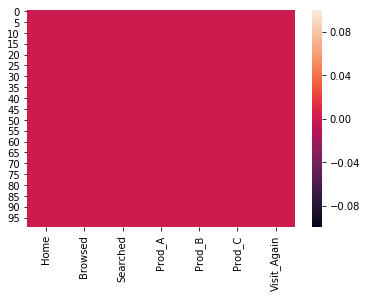

In [16]:
missing_values = dfnew.isnull()
missing_values

sns.heatmap(data = missing_values)


### 5. Lihat perbandingan jumlah class 0 dan 1

0    61
1    39
Name: Visit_Again, dtype: int64

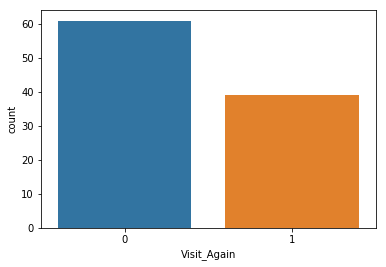

In [17]:
sns.countplot(x='Visit_Again', data=dfnew)
dfnew.Visit_Again.value_counts()


### 6. Siapkan data untuk training secara biasa dan training dengan cross validation

In [18]:
feature = attrs
feature.pop()
feature

['Home', 'Browsed', 'Searched', 'Prod_A', 'Prod_B', 'Prod_C']

In [19]:
features = dfnew[feature]
label = dfnew['Visit_Again']

X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.25, random_state=101)
feature

['Home', 'Browsed', 'Searched', 'Prod_A', 'Prod_B', 'Prod_C']


###  7. Train data secara biasa, didapatkan skor sebesar 0.64

In [20]:
naivebayesmodel = BernoulliNB()

naivebayesmodel.fit(X_train, y_train)
print("SCORE : ",naivebayesmodel.score(X_test, y_test))

SCORE :  0.56



###  8. Train data dengan cross-validation, didapatkan skor sebesar 0.58

In [21]:
naivebayesmodelkfold = BernoulliNB()

score =  cross_val_score(naivebayesmodelkfold, features, label, cv=5)
print("CROSS VALIDATION SCORE : ",statistics.mean(score))

CROSS VALIDATION SCORE :  0.5200751879699248



### 9.  Melihat log probabilitas setiap fitur dari class 0 dan 1

In [22]:
class0_attrprob = naivebayesmodel.feature_log_prob_[0]
class1_attrprob = naivebayesmodel.feature_log_prob_[1]
print("probability of class 0 ")
for i in (range(len(naivebayesmodel.feature_log_prob_[0]))):
    print("feature ",i+1,": ",pow(2,class0_attrprob[i]))

print("\nprobability of class 1 ")
for i in (range(len(naivebayesmodel.feature_log_prob_[1]))):
    print("feature ",i+1,": ",pow(2,class1_attrprob[i]))

probability of class 0 
feature  1 :  0.732575714272584
feature  2 :  0.7826070218144325
feature  3 :  0.5337704624000148
feature  4 :  0.6275952022872798
feature  5 :  0.7155617759223357
feature  6 :  0.6093515137984894

probability of class 1 
feature  1 :  0.6711168360853097
feature  2 :  0.7954032230077729
feature  3 :  0.4465362457883447
feature  4 :  0.7712692781806878
feature  5 :  0.6711168360853097
feature  6 :  0.591444335183008
